## Driver Performance Analysis (2014–2024)
This notebook explores the performance of Formula 1 drivers over the past decade.
It uses:

* Total Wins per Driver – Identifies the most successful drivers overall across all races from 2014 to 2024.
* Wins per Driver Over Seasons – Tracks how driver performance changes year by year, highlighting trends, improvements, and declines.
* Track-Specific Dominance – Analyzes which drivers perform best at specific Grand Prix circuits using a heatmap for visual comparison.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading combined data 
all_data = pd.read_csv("../data/all_f1_data.csv")
all_data.head()

,GRAND PRIX,DATE,WINNER,TEAM,LAPS,TIME,YEAR
0,Australia,16-Mar,Nico Rosberg,Mercedes,57.0,32:58.7,2014
1,Malaysia,30-Mar,Lewis Hamilton,Mercedes,56.0,40:26.0,2014
2,Bahrain,6-Apr,Lewis Hamilton,Mercedes,57.0,39:42.7,2014
3,China,20-Apr,Lewis Hamilton,Mercedes,54.0,33:28.3,2014
4,Spain,11-May,Lewis Hamilton,Mercedes,66.0,41:05.2,2014


WINNER
Lewis Hamilton      83
Max Verstappen      63
Nico Rosberg        20
Sebastian Vettel    14
Valtteri Bottas     10
Daniel Ricciardo     8
Charles Leclerc      8
Sergio Perez         6
Carlos Sainz         4
Lando Norris         4
George Russell       3
Oscar Piastri        2
Kimi Räikkönen       1
Pierre Gasly         1
Esteban Ocon         1
Name: count, dtype: int64


/tmp/ipykernel_1256117/2220861947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_per_driver.index, y=wins_per_driver.values, palette="magma")


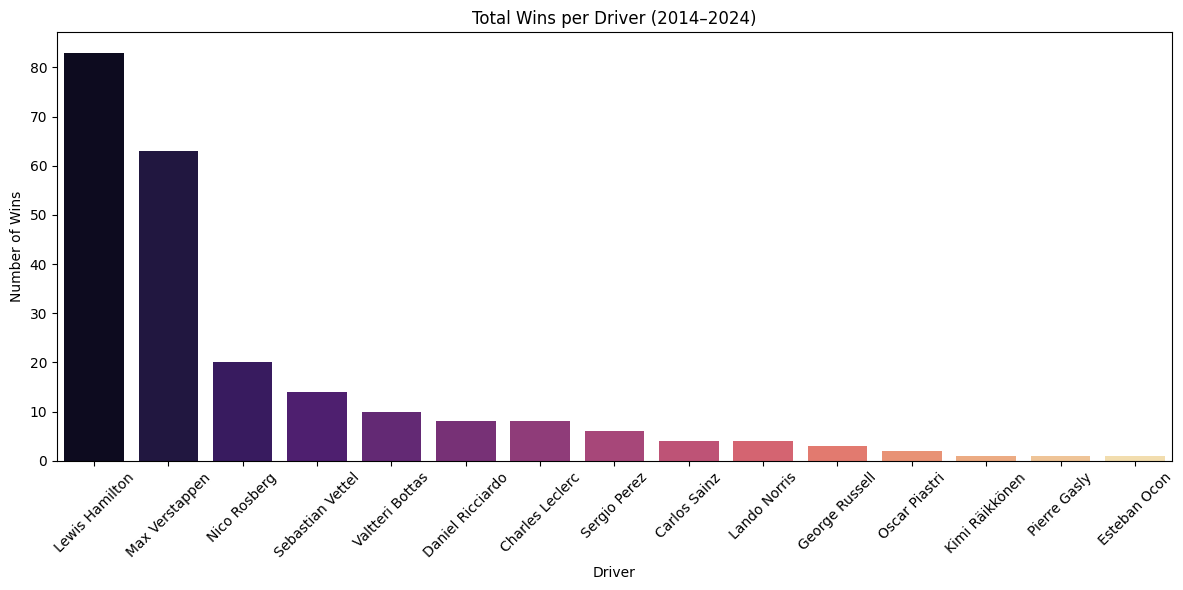

In [3]:
# Total wins per driver
wins_per_driver=all_data['WINNER'].value_counts()
print(wins_per_driver)
#plot total wins 
plt.figure(figsize=(12,6))
sns.barplot(x=wins_per_driver.index, y=wins_per_driver.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Total Wins per Driver (2014–2024)")
plt.ylabel("Number of Wins")
plt.xlabel("Driver")
plt.tight_layout()
plt.savefig("../visuals/total_wins_per_driver.png")
plt.show()

WINNER  Carlos Sainz  Charles Leclerc  Daniel Ricciardo  Esteban Ocon  \
YEAR                                                                    
2014               0                0                 3             0   
2015               0                0                 0             0   
2016               0                0                 1             0   
2017               0                0                 1             0   
2018               0                0                 2             0   
2019               0                2                 0             0   
2020               0                0                 0             0   
2021               0                0                 1             1   
2022               1                3                 0             0   
2023               1                0                 0             0   
2024               2                3                 0             0   

WINNER  George Russell  Kimi Räikkönen  Lando Norr

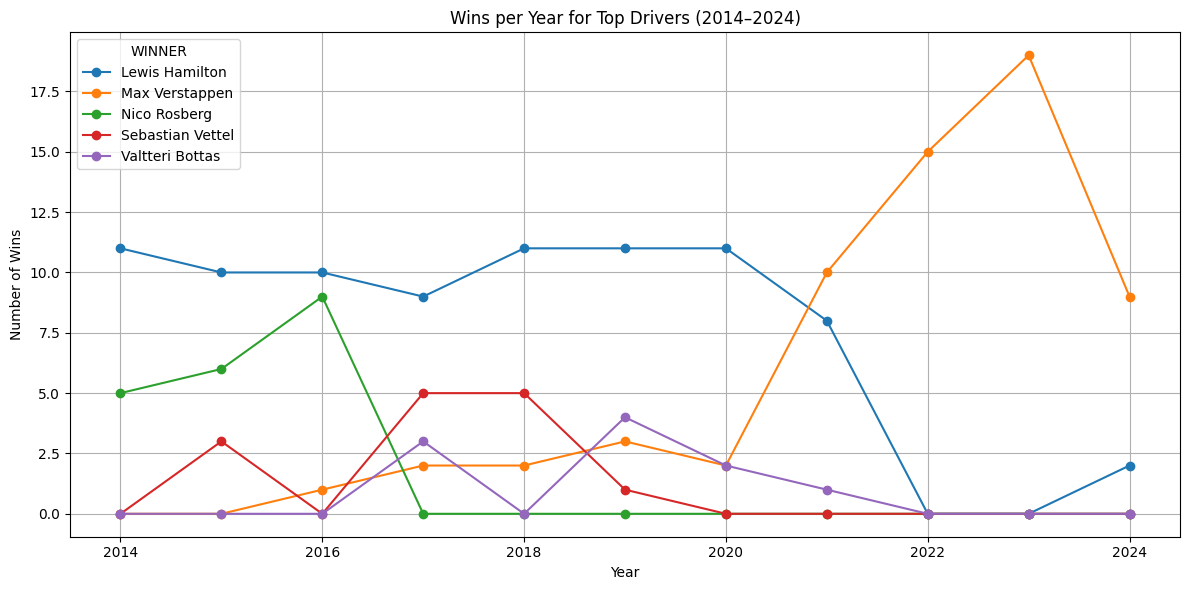

In [4]:
# Wins per year per driver
driver_year_wins = all_data.groupby(['YEAR', 'WINNER']).size().unstack(fill_value=0)
print(driver_year_wins)
# Top 5 drivers for line chart
top_drivers = wins_per_driver.head(5).index
driver_year_wins[top_drivers].plot(figsize=(12,6), marker='o')
plt.title("Wins per Year for Top Drivers (2014–2024)")
plt.ylabel("Number of Wins")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/top_drivers_over_years.png")
plt.show()


WINNER            Carlos Sainz  Charles Leclerc  Daniel Ricciardo  \
GRAND PRIX                                                          
70th Anniversary             0                0                 0   
Abu Dhabi                    0                0                 0   
Australia                    1                1                 0   
Austria                      0                1                 0   
Azerbaijan                   0                0                 1   
Bahrain                      0                1                 0   
Belgium                      0                1                 1   
Brazil                       0                0                 0   
Canada                       0                0                 1   
China                        0                0                 1   
Eifel                        0                0                 0   
Emilia-Romagna               0                0                 0   
Europe                       0    

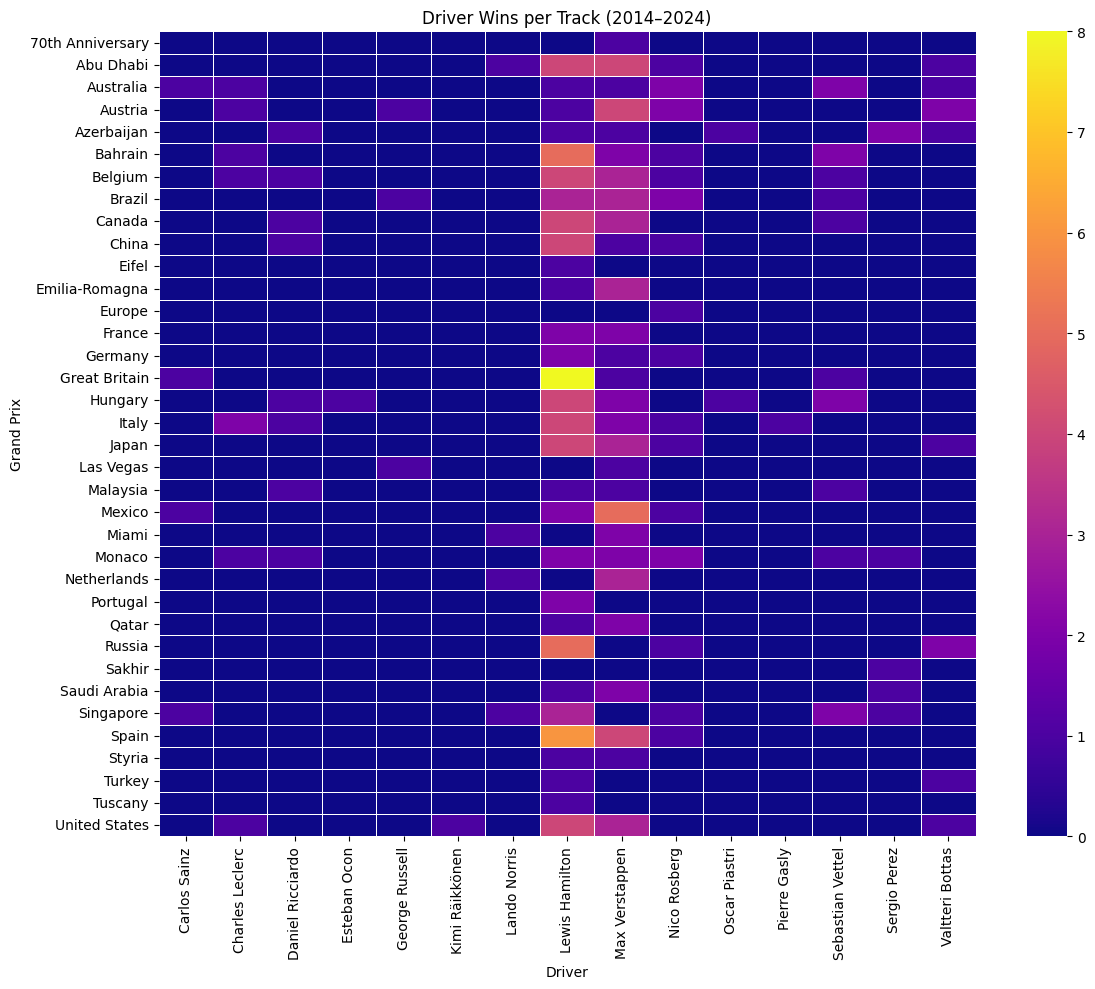

In [5]:
# Wins per driver per track
track_driver_wins = all_data.groupby(['GRAND PRIX', 'WINNER']).size().unstack(fill_value=0)
print(track_driver_wins)
plt.figure(figsize=(12,10))
sns.heatmap(track_driver_wins, cmap="plasma", linewidths=0.5)
plt.title("Driver Wins per Track (2014–2024)")
plt.xlabel("Driver")
plt.ylabel("Grand Prix")
plt.tight_layout()
plt.savefig("../visuals/track_wins_per_driver.png")
plt.show()